# Flight Price Prediction
---

### BDM 3014 - Introduction to Artificial Intelligence 
#### Final Project

### Participants


*   Kavit Soni
*   Dhruv Chetankumar Ajmeri
*   Aishwarya Ganeshan
*   Ajinkya Chafekar
*   Junaid Ansari
*   Meet Patel







## Importing the libraries


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing dataset

In [55]:
df = pd.read_excel(r"Data_Train.xlsx")

In [56]:
#To display all the columns in the dataset in the excel file
pd.set_option('display.max_columns', None)

In [57]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64


<AxesSubplot:>

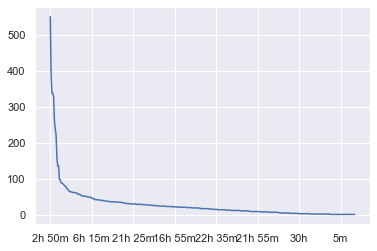

In [59]:
print(df["Duration"].value_counts())
df["Duration"].value_counts().plot()

In [60]:
#To drop null values and overwrite the data using inplace = true
df.dropna(inplace = True)

In [61]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

## EDA

Taking the day and month out from the date column

In [62]:
#To extract the date from the "Date of Journey" column 
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [63]:
#To extract the month from the "Date of Journey" column
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [64]:
#Displaying newly added columns Journey_day and Journey_month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [65]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

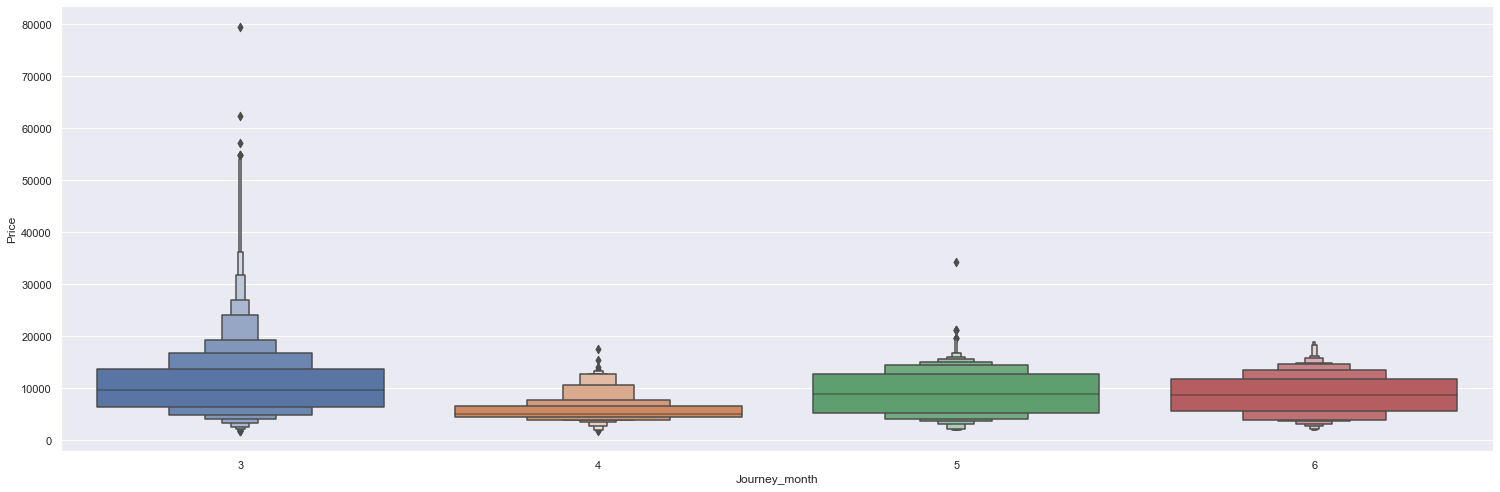

In [66]:
# Journey Month Vs Price
sns.catplot(y = "Price", x = "Journey_month", data = df.sort_values("Price", ascending = False), kind="boxen", height = 7, aspect = 3)
plt.show()

In [67]:
# Similar to Date_of_Journey we can extract values from Dep_Time

#To extract the hours from the "Dep_Time" column and adding a new column named Dep_hour
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

#To extract the minutes from the "Dep_Time" column and adding a new column named Dep_min
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Dropping the column Dep_Time 
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [68]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [69]:
# Similar to Date_of_Journey we can extract values from Arrival_Time

#To extract the hours from the "Dep_Time" column and adding a new column named Arrival_hour
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

#To extract the minutes from the "Dep_Time" column and adding a new column named Arrival_min
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Dropping column Arrival_Time
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [70]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [71]:
# Journey time is equal to the differnce between Departure Time and Arrival time

# Assigning and converting Duration column into list
journey_time = list(df["Duration"])

for i in range(len(journey_time)):
    if len(journey_time[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in journey_time[i]:
            journey_time[i] = journey_time[i].strip() + " 0m"   # Adds 0 minute
        else:
            journey_time[i] = "0h " + journey_time[i]           # Adds 0 hour

journey_time_hours = []
journey_time_mins = []
for i in range(len(journey_time)):
    journey_time_hours.append(int(journey_time[i].split(sep = "h")[0]))    # Extract hours from duration
    journey_time_mins.append(int(journey_time[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [72]:
# Adding journey_time_hours and journey_time_mins list to df dataframe

df["Journey_time_hours"] = journey_time_hours
df["Journey_time_mins"] = journey_time_mins

In [73]:
df.drop(["Duration"], axis = 1, inplace = True)

In [74]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_time_hours,Journey_time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


---

## Handling Categorical Data

Here to handle categorical data we use **OneHotEncoding** because the variables do not have any relation with each other 

In [75]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

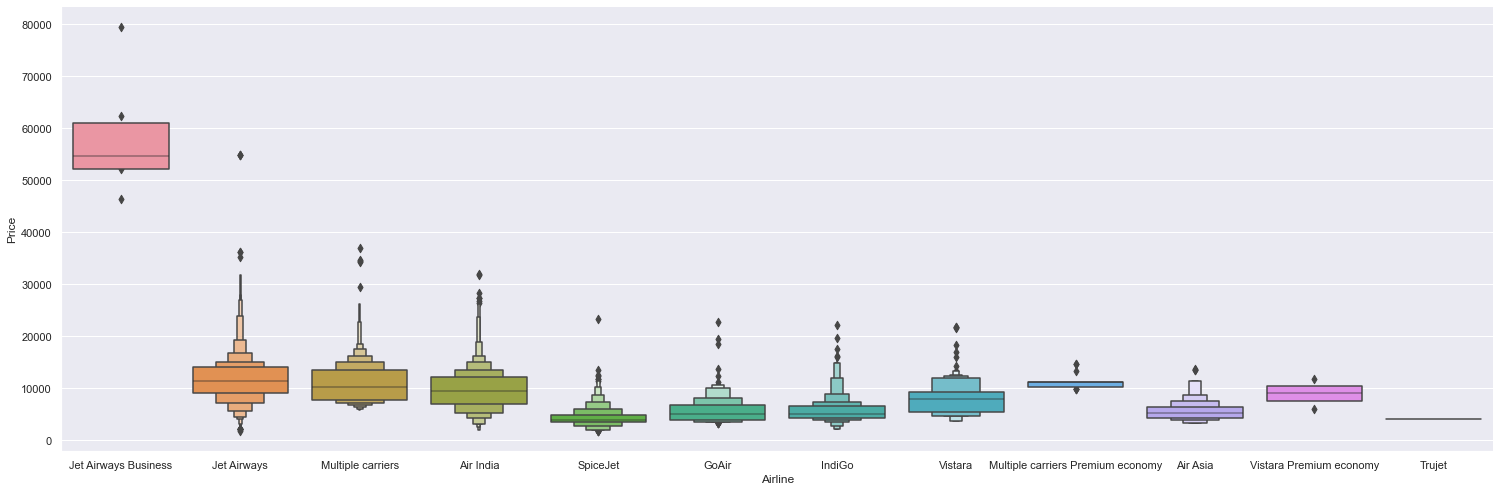

In [76]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 7, aspect = 3)
plt.show()

In [77]:
# Airline is Nominal Categorical data, OneHotEncoding is performed

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [78]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

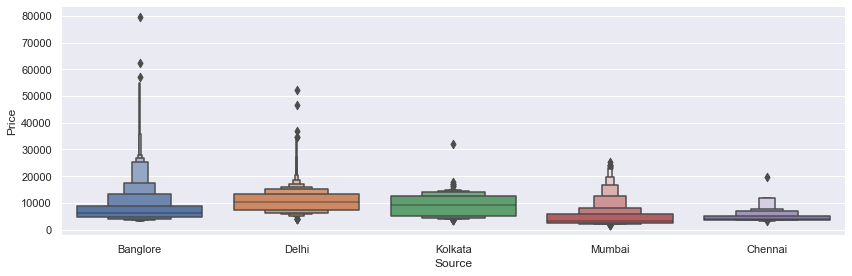

In [79]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [80]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [81]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [82]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [83]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [84]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [85]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [86]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [87]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_time_hours,Journey_time_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


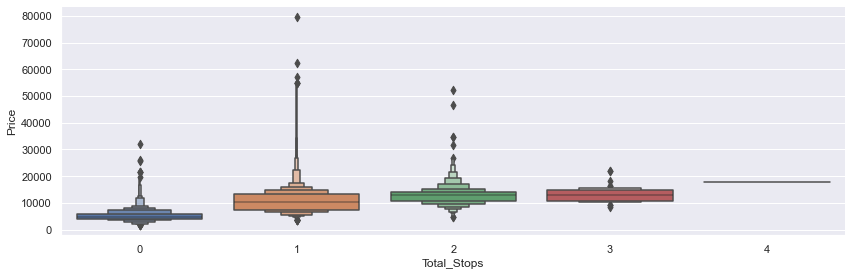

In [88]:
# Total_Stops vs Price
sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [89]:
# Concatenate dataframe --> df + Airline + Source + Destination

df_train = pd.concat([df, Airline, Source, Destination], axis = 1)

In [90]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_time_hours,Journey_time_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [91]:
df_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [92]:
df_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_time_hours,Journey_time_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [93]:
df_train.shape

(10682, 30)

---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,

In [94]:
df_train.shape

(10682, 30)

In [95]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Journey_time_hours',
       'Journey_time_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [96]:
X = df_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Journey_time_hours',
       'Journey_time_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_time_hours,Journey_time_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [97]:
y = df_train.loc[:, ['Price']]
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


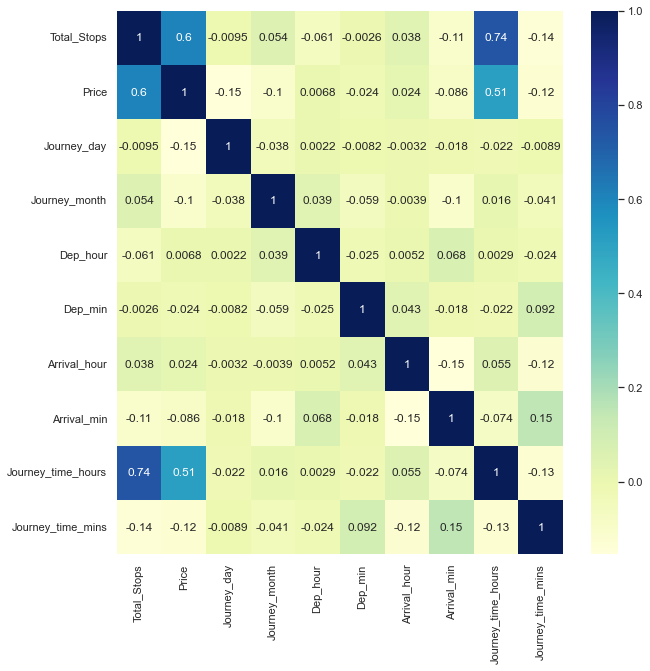

In [98]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True,cmap="YlGnBu" )

plt.show()

In [99]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

C:\Users\16475\AppData\Local\Temp\ipykernel_20524\2896054759.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X, y)


ExtraTreesRegressor()

In [100]:
print(selection.feature_importances_)

[2.26785338e-01 1.44077084e-01 5.28281020e-02 2.37020566e-02
 2.13345029e-02 2.75484128e-02 1.90543117e-02 1.34109122e-01
 1.74028214e-02 8.87904064e-03 1.96797534e-03 1.86472672e-02
 1.33649172e-01 6.69304162e-02 1.80787317e-02 8.11572140e-04
 2.94847984e-03 4.88874724e-03 7.69759902e-05 4.01389197e-04
 8.39117406e-03 3.68889676e-03 7.37103030e-03 1.13579173e-02
 1.38917124e-02 5.85788298e-03 4.77529470e-04 2.48423380e-02]


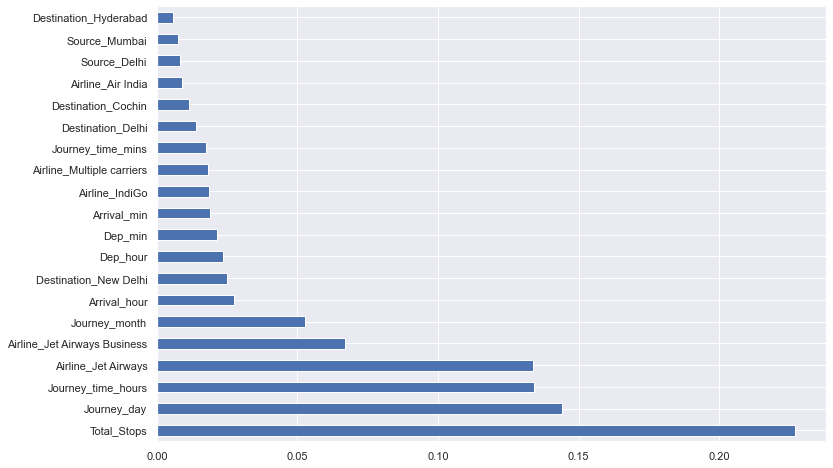

In [101]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feature_imp = pd.Series(selection.feature_importances_, index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

---

## Fitting model using Random Forest

### Why Random forest?

Random Forest uses Decision trees to process the and train the data. A number of decision trees are generated and the agregate of those decisions are chosen to finalize the random forest method results.

The reason why we do not use the decision tree classification is that it has its disadvantages such as overfitting and bias. To overcome that issues the Rando forest method is used which reduces the overfitting and bias



In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [103]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

C:\Users\16475\AppData\Local\Temp\ipykernel_20524\2751168992.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rf.fit(X_train, y_train)


RandomForestRegressor()

In [104]:
y_pred = reg_rf.predict(X_test)

In [105]:
X_test

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_time_hours,Journey_time_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6075,2,21,5,15,5,1,30,10,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3544,1,3,6,10,35,19,35,9,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
9291,1,9,5,20,20,9,5,12,45,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5032,0,24,5,14,45,17,5,2,20,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2483,1,21,5,22,50,4,25,5,35,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,1,27,6,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
9871,0,6,3,17,15,19,45,2,30,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
10063,1,21,4,7,55,22,25,14,30,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8802,1,24,3,6,30,23,25,16,55,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [106]:
y_pred

array([16841.54      ,  5593.69      ,  8882.55      , ...,
        6599.36      , 13014.19916667, 12944.32288889])

In [107]:
reg_rf.score(X_train, y_train)

0.9534907789596512

In [108]:
reg_rf.score(X_test, y_test)

0.7961419749626089

In [109]:
y_pred = y_pred.reshape(2137,1)

In [110]:
print(y_pred)

[[16841.54      ]
 [ 5593.69      ]
 [ 8882.55      ]
 ...
 [ 6599.36      ]
 [13014.19916667]
 [12944.32288889]]


C:\Users\16475\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


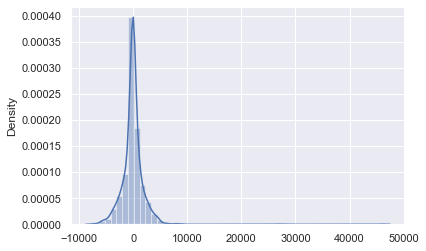

In [111]:
sns.distplot(y_test-y_pred)
plt.show()

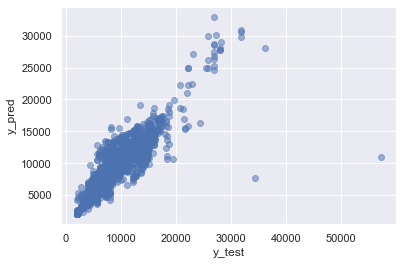

In [112]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [113]:
from sklearn import metrics

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1182.0855520725956
MSE: 4395598.217988612
RMSE: 2096.5682001758523


In [115]:
metrics.r2_score(y_test, y_pred)

0.7961419749626089

---

In [127]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1166.8207760280618
MSE: 4061836.425157296
RMSE: 2015.399817693079


---